In [26]:
import pandas as pd
import numpy as np
import logging as log

from data_prepare import getLogsFromDBByUserID

In [28]:
df = pd.read_pickle('../data/173211-9739.pkl')
df['event'] = df['method'] + ':' + df['urlEntry']

In [40]:
eventMap = {event: id for id, event in enumerate(df['event'].value_counts().keys())}
for id in eventMap.values(): 
    if id == 0:
        print(id)

In [47]:
for id, event in enumerate(df['event'].value_counts().keys()):
    print((id, event))

(0, 'GET:/fin/arRulesSetCommon/get/{id}')
(1, 'POST:/fin/arBillAssembly/getRefInfoList')
(2, 'GET:/fin/arBillAssembly/getBankInfo/{userId}/{acctype}')
(3, 'POST:/fin/arBillWF/doWorkFlow')
(4, 'GET:/fin/arBill/getArBillAllTODO')
(5, 'POST:/od/workflow/getToDoList')
(6, 'GET:/fa/asset/assetInfo/remoteGetPagedCanUseList')
(7, 'POST:/fin/arBill/getArBillAll')
(8, 'GET:/fa/commoncore/assetCommonCore/remoteGetCurrenUserInfo')
(9, 'GET:/fin/ar/billSource/getNodeDetail/{sourceId}')
(10, 'GET:/fin/arBillType/{billType}')
(11, 'GET:/fin/arExpenseLinkBillType/getExpenseLinkBillTypeSetByBillType/{billType}')
(12, 'POST:/portal/menus')
(13, 'GET:/portal/shortcutconfig/getConfigCompletion')
(14, 'GET:/fa/commoncore/todoCommonCore/remoteGetTotalTodoNum')
(15, 'GET:/fin/arBillType/queryUsedBillType/1/ar')
(16, 'GET:/fa/commoncore/assetCommonCore/remoteGetDataDictionary')
(17, 'GET:/fa/commoncore/todoCommonCore/remoteGetPagedPendingList')
(18, 'POST:/fin/arBillMessage/send')
(19, 'POST:/fin/arBillTrave

In [18]:
from datetime import datetime
# 增加日期
df['date'] = df['time'].apply(lambda x : datetime.fromtimestamp(x))
df.sort_values(by='time', ascending=True, inplace=True)
df = df.reset_index(drop=True)

In [19]:
dates = df['date'].copy()
dates.sort_values(ascending=True, inplace=True)
# print(dates)
values = []
for i in range(1, len(dates)):
    values.append((dates[i] - dates[i-1]).total_seconds())
    if (dates[i] < dates[i-1]): 
        print(i, dates[i-1], dates[i])
v = np.asarray(values)
# values

NameError: name 'np' is not defined

In [ ]:
dates

0      2020-04-07 10:31:42.199
1      2020-04-07 10:31:42.311
2      2020-04-07 10:31:42.891
3      2020-04-07 10:31:44.093
4      2020-04-07 10:31:44.114
                 ...          
1853   2021-03-05 16:41:35.259
1854   2021-03-05 16:41:35.277
1855   2021-03-05 16:41:35.623
1856   2021-03-05 16:41:35.668
1857   2021-03-05 16:41:35.716
Name: date, Length: 1858, dtype: datetime64[ns]

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# threshold = 60*60*2
threshlodd = 30
data = []
for i in values:
#     if i < threshold and i >= threshlodd: 
    data.append(i)
# max(data)
# d = np.asarray(data)
# plt.hist(bins=300, x=d)

[0.112,
 0.58,
 1.202,
 0.021,
 20.726,
 0.026,
 1.781,
 0.107,
 0.523,
 1.837,
 0.002,
 0.002,
 0.15,
 0.002,
 0.004,
 41.263,
 0.116,
 0.422,
 1658037.32,
 0.185,
 0.641,
 2.827,
 0.037,
 47.451,
 0.04,
 39.155,
 0.034,
 28.153,
 0.007,
 8.236,
 0.297,
 0.439,
 226.117,
 0.209,
 0.899,
 428.181,
 0.141,
 1.014,
 145.093,
 0.18,
 0.672,
 81.632,
 0.204,
 0.86,
 76.044,
 0.215,
 0.73,
 114.891,
 0.18,
 0.738,
 2593.134,
 0.238,
 0.998,
 74.634,
 0.195,
 0.63,
 65.559,
 0.136,
 0.522,
 1224.435,
 0.226,
 0.975,
 64963.674,
 0.159,
 0.635,
 1.133,
 0.036,
 39.643,
 0.142,
 0.447,
 135.494,
 0.125,
 0.51,
 3.839,
 0.015,
 74.838,
 0.11,
 0.523,
 119.283,
 0.14,
 0.463,
 2.249,
 0.021,
 34.182,
 0.017,
 16334242.403,
 0.084,
 0.208,
 0.014,
 0.01,
 0.007,
 0.051,
 0.004,
 0.02,
 0.031,
 0.07,
 0.047,
 0.525,
 0.048,
 0.086,
 10.714,
 0.317,
 0.005,
 0.0,
 0.001,
 0.0,
 0.029,
 1.766,
 9.286,
 6.883,
 0.003,
 0.0,
 0.004,
 0.036,
 0.0,
 0.0,
 0.001,
 0.028,
 0.027,
 0.023,
 0.03,
 0.362,
 0

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


<AxesSubplot:>

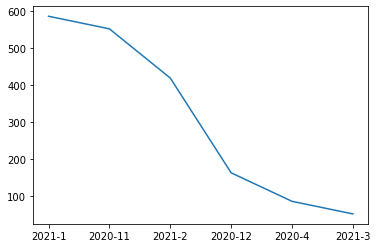

In [ ]:
months = df['date'].apply(lambda x : "%d-%d"%(x.year, x.month))
data = months.value_counts()
data.plot()

In [ ]:
df

,time,urlEntry,method,parameterName,headers,name,ip,date
0,1.586270e+09,/fa/commoncore/assetCommonCore/remoteGetCurren...,GET,,"[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:42.199
1,1.586270e+09,/fa/asset/assetInfo/remoteGetPagedCanUseList,GET,"[""offset"",""limit"",""sort"",""example""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:42.311
2,1.586270e+09,/fa/commoncore/todoCommonCore/remoteGetTotalTo...,GET,,"[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:42.891
3,1.586270e+09,/fa/commoncore/assetCommonCore/remoteGetDataDi...,GET,"[""types""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:44.093
4,1.586270e+09,/fa/commoncore/todoCommonCore/remoteGetPagedPe...,GET,"[""offset"",""limit"",""sort"",""example""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:44.114
...,...,...,...,...,...,...,...,...
1853,1.614980e+09,/pm/integrate/prjInfoIntegrate/getPersonalPrjD...,GET,,"[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.259
1854,1.614980e+09,/fa/asset/assetInfo/remoteGetPagedCanUseList,GET,"[""offset"",""limit"",""sort"",""example""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.277
1855,1.614980e+09,/fin/arBill/getArBillAllTODO,GET,"[""mobile""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.623
1856,1.614980e+09,/pm/commoncore/todoCommonCore/getPmTotalPendin...,GET,"[""isMobile""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.668


In [ ]:
output = '../data/rewriteLog.log'
with open(output, 'w') as f:
    for logEntry in df.itertuples():
        f.write("%s %s %s %s %s %s %s\n" % (
            logEntry[8],
            logEntry[2],
            logEntry[3],
            logEntry[4],
            logEntry[5],
            logEntry[6],
            logEntry[7],
        ))

In [ ]:
from spellpy import spell

tau = 0.5
# input_dir = '../data/'
output_dir = '../data/output/'
log_format = '<Date> <Time> <Url> <Method> <Content> <Headers> <Name> <ADDR>'

parser = spell.LogParser(
    indir='./',
    outdir='./',
    log_format=log_format,
#     logmain=log_main,
    tau=tau,
)

parser.parse(output)


[2021-11-19 06:29:37,874][INFO]: Parsing file: ./../data/rewriteLog.log
[2021-11-19 06:29:37,926][INFO]: Loaded 100.0% of log lines.
[2021-11-19 06:29:37,931][INFO]: load_data() finished!
[2021-11-19 06:29:38,029][INFO]: Processed 100.0% of log lines.
[2021-11-19 06:29:38,056][INFO]: Output parse file
[2021-11-19 06:29:38,071][INFO]: rootNodePath: ./rootNode.pkl
[2021-11-19 06:29:38,073][INFO]: logCluLPath: ./logCluL.pkl
[2021-11-19 06:29:38,074][INFO]: Store objects done.
[2021-11-19 06:29:38,074][INFO]: Parsing done. [Time taken: 0:00:00.200329]


In [23]:
df

,time,urlEntry,method,parameterName,headers,name,ip,date
0,1.586270e+09,/fa/commoncore/assetCommonCore/remoteGetCurren...,GET,,"[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:42.199
1,1.586270e+09,/fa/asset/assetInfo/remoteGetPagedCanUseList,GET,"[""offset"",""limit"",""sort"",""example""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:42.311
2,1.586270e+09,/fa/commoncore/todoCommonCore/remoteGetTotalTo...,GET,,"[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:42.891
3,1.586270e+09,/fa/commoncore/assetCommonCore/remoteGetDataDi...,GET,"[""types""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:44.093
4,1.586270e+09,/fa/commoncore/todoCommonCore/remoteGetPagedPe...,GET,"[""offset"",""limit"",""sort"",""example""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""Authori...",王静秋,103.254.68.232,2020-04-07 10:31:44.114
...,...,...,...,...,...,...,...,...
1853,1.614980e+09,/pm/integrate/prjInfoIntegrate/getPersonalPrjD...,GET,,"[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.259
1854,1.614980e+09,/fa/asset/assetInfo/remoteGetPagedCanUseList,GET,"[""offset"",""limit"",""sort"",""example""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.277
1855,1.614980e+09,/fin/arBill/getArBillAllTODO,GET,"[""mobile""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.623
1856,1.614980e+09,/pm/commoncore/todoCommonCore/getPmTotalPendin...,GET,"[""isMobile""]","[{""httpOnly"":false,""maxAge"":-1,""name"":""fine_re...",王静秋,159.226.182.102,2021-03-05 16:41:35.668


In [27]:
def deeplog_df_transfer(df, event_id_map):
  
    df = df[['date', 'event']]
    df['EventId'] = df['event'].apply(
        lambda e: event_id_map[e] if event_id_map.get(e) else -1)
    deeplog_df = df.set_index('date').resample(
        '30min').apply(_custom_resampler).reset_index()
    return deeplog_df


def _custom_resampler(array_like):
    return list(array_like)

def deeplog_file_generator(filename, df):
    with open(filename, 'w') as f:
        for event_id_list in df['EventId']:
            if (len(event_id_list) == 0):
                continue
            for event_id in event_id_list:
                f.write(str(event_id) + ' ')
            f.write('\n')

In [24]:
df['event'] = df['method'] + ':' + df['urlEntry']
event_id_map = dict()
for i, event_id in enumerate(df['event'].unique(), 1):
    event_id_map[event_id] = i
event_id_map

{'GET:/fa/commoncore/assetCommonCore/remoteGetCurrenUserInfo': 1,
 'GET:/fa/asset/assetInfo/remoteGetPagedCanUseList': 2,
 'GET:/fa/commoncore/todoCommonCore/remoteGetTotalTodoNum': 3,
 'GET:/fa/commoncore/assetCommonCore/remoteGetDataDictionary': 4,
 'GET:/fa/commoncore/todoCommonCore/remoteGetPagedPendingList': 5,
 'GET:/portal/menus/mine/pc': 6,
 'GET:/portal/shortcutconfig/getConfigCompletion': 7,
 'GET:/fin/ar/billSource/getNodeDetail/{sourceId}': 8,
 'POST:/fin/arBill/getMyCommitBill': 9,
 'POST:/portal/menus': 10,
 'POST:/hr/thrpeople': 11,
 'GET:/od/workflow/getAllTodoNumber': 12,
 'GET:/pm/integrate/prjInfoIntegrate/getPersonalPrjDataVo': 13,
 'GET:/fin/arBill/getArBillAllTODO': 14,
 'GET:/pm/commoncore/todoCommonCore/getPmTotalPendingCount': 15,
 'POST:/portal/userusages': 16,
 'GET:/fin/arBillType/queryUsedBillType/1/ar': 17,
 'POST:/portal/dept': 18,
 'POST:/fin/arFinancialBooks/getOU': 19,
 'POST:/fin/arBill/getArBillAll': 20,
 'GET:/fin/arRulesSetCommon/get/{id}': 21,
 'G

## train

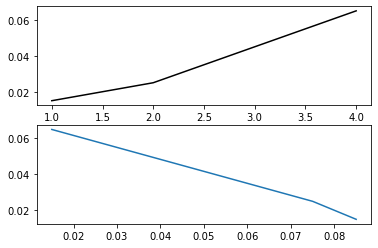

In [9]:
epochs = range (1, 5)
losss = [0.015, 0.025, 0.045, 0.065]
accs = [0.085, 0.075, 0.045, 0.015]

import matplotlib.pyplot as plt
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)
ax1.plot(epochs, losss, 'k')
ax2.plot(accs, losss)
